## Importing Datasets:

importing MTA & Car Collisions Datasets:

In [1]:
import pandas as pd

importing Car Collisions Dataset using pandas:

In [2]:
# importing Car Collisions Dataset:
CarCollisions_df = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv')

C:\Users\SDAIA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
CarCollisions_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


Checking the number of rows in Car Collisions Dataset:

In [3]:
# no of rows
CarCollisions_df['CRASH TIME'].count()

1815759

# Reading from DB


Reading MTA dataset from MTA database:

*NOTE: I could not upload the database to the github repo due to its large size.

In [4]:
#reading MTA dataset from MTA database
import sqlite3

connection = sqlite3.connect("MTA.db")
crsr = connection.cursor()
turnstiles_df = pd.read_sql_query("SELECT * FROM turnstile", connection)

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


Checking the number of rows in MTA Dataset:

In [6]:
# number of rows in the dataset

sum(turnstiles_df['C/A'].value_counts())

2684040

Checking column names for both MTA and Car Collisions Datasets:

In [7]:
# get column names (MTA)
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
# get column names (Car Collisions)
CarCollisions_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

Adding new column to change the date and time type to datetime:

In [10]:
#chnage datetime type 
import datetime

# MTA
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,2019-04-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,2019-04-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,2019-04-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,2019-04-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,2019-04-27 16:00:00


In [11]:
# Car Collisions:
CarCollisions_df["DATE_TIME"] = pd.to_datetime(CarCollisions_df['CRASH DATE'] + " " + CarCollisions_df['CRASH TIME'])
CarCollisions_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATE_TIME
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN,2021-04-14 05:32:00
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN,2021-04-13 21:35:00
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2021-04-15 16:15:00
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN,2021-04-13 16:00:00
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2021-04-12 08:25:00


# Cleaning data:
### 1.  MTA Dataset:
  #### Remove duplicates:
  Checking for duplicates and removing them. 

In [12]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2150954,R249,R179,01-05-00,86 ST,2019-06-27 04:00:00,2
2170590,R256,R182,00-00-03,116 ST,2019-07-24 21:00:00,2
633871,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-17 09:00:00,2
634390,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,2
634548,N045,R187,01-06-00,81 ST-MUSEUM,2019-07-09 09:00:00,2


In [13]:
# check the records that are not unique

mask = ((turnstiles_df["C/A"] == "N045") & 
(turnstiles_df["UNIT"] == "R187") & 
(turnstiles_df["SCP"] == "01-06-01") & 
(turnstiles_df["STATION"] == "81 ST-MUSEUM") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 7, 9).date()))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2109211,N045,R187,01-06-01,81 ST-MUSEUM,BC,IND,07/09/2019,01:00:00,REGULAR,2141917,353794,2019-07-09 01:00:00
2109212,N045,R187,01-06-01,81 ST-MUSEUM,BC,IND,07/09/2019,05:00:00,REGULAR,2141917,353797,2019-07-09 05:00:00
2109213,N045,R187,01-06-01,81 ST-MUSEUM,BC,IND,07/09/2019,09:00:00,REGULAR,2141920,353797,2019-07-09 09:00:00
2109214,N045,R187,01-06-01,81 ST-MUSEUM,BC,IND,07/09/2019,09:00:00,RECOVR AUD,2141918,353797,2019-07-09 09:00:00
2109215,N045,R187,01-06-01,81 ST-MUSEUM,BC,IND,07/09/2019,13:00:00,REGULAR,2141940,353805,2019-07-09 13:00:00


In [14]:
# check the records that are not unique

mask = ((turnstiles_df["C/A"] == "R256") & 
(turnstiles_df["UNIT"] == "R182") & 
(turnstiles_df["SCP"] == "00-00-03") & 
(turnstiles_df["STATION"] == "116 ST") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 7, 24).date()))

turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2644836,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,01:00:00,REGULAR,304288,251923,2019-07-24 01:00:00
2644837,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,05:00:00,REGULAR,304307,251945,2019-07-24 05:00:00
2644838,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,09:00:00,REGULAR,304901,252245,2019-07-24 09:00:00
2644839,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,13:00:00,REGULAR,305391,252559,2019-07-24 13:00:00
2644840,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,17:00:00,REGULAR,305859,252912,2019-07-24 17:00:00
2644841,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,21:00:00,REGULAR,306182,253250,2019-07-24 21:00:00
2644842,R256,R182,00-00-03,116 ST,6,IRT,07/24/2019,21:00:00,RECOVR AUD,0,82,2019-07-24 21:00:00


It appears that there are 2 records of the same turnstile at the same date and the same time. The only differnce is the DESC column, one record is REGULAR and the other is RECOVER AUD. 

The records that have DESC as RECOVER AUD could be generated due to a problem with the turnstile and the entries was recoverd.
in this project I am only interested in the number of entries, so with removing the duplicates, the calculations will not be affected.

In [15]:
# Removing the duplicates using 'drop_duplicates'

turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [16]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-04-27 00:00:00,1
1789353,R141,R031,00-03-01,34 ST-PENN STA,2019-07-15 16:00:00,1
1789335,R141,R031,00-03-01,34 ST-PENN STA,2019-07-12 16:00:00,1
1789336,R141,R031,00-03-01,34 ST-PENN STA,2019-07-12 20:00:00,1
1789337,R141,R031,00-03-01,34 ST-PENN STA,2019-07-13 00:00:00,1


since all the values of column 'entries' are 1s, then the combination "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique.

#### Drop unwanted columns:
Next, drop the columns that are not needed, which are 'DESC' and 'EXITS'.

In [17]:
# Drop Exits and Desc Columns:

turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [21]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
2684039,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/26/2019,21:00:00,5554,2019-07-26 21:00:00
2684038,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/26/2019,17:00:00,5554,2019-07-26 17:00:00
2684037,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/26/2019,13:00:00,5554,2019-07-26 13:00:00
2684036,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/26/2019,09:00:00,5554,2019-07-26 09:00:00
2684035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/26/2019,05:00:00,5554,2019-07-26 05:00:00


#### Remove NULLs: 
Checking for NULL values in the dataset: 

In [22]:
#check for null values

turnstiles_df.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
ENTRIES      0
DATE_TIME    0
dtype: int64

No NULL values was found in the dataset.

### 2.  Car Collisions Dataset:
  #### Remove duplicates:
  Checking for duplicates and removing them. 

In [23]:
# Sanity Check to verify that "COLLISION_ID" is unique

(CarCollisions_df
 .groupby(['COLLISION_ID', 'DATE_TIME'])
 .count()
 .reset_index()
 .sort_values("CRASH DATE", ascending=False)).head()


,COLLISION_ID,DATE_TIME,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,22,2012-07-01 10:40:00,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,0,0
1210502,3846859,2018-02-12 15:00:00,1,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1210513,3846870,2018-02-16 04:50:00,1,1,0,0,0,0,0,1,...,1,1,0,0,0,1,1,0,0,0
1210512,3846869,2018-02-15 21:45:00,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,0,0
1210511,3846868,2018-02-15 17:30:00,1,1,1,1,1,1,1,0,...,1,1,0,0,0,1,1,0,0,0


No duplicate values was found.

#### Remove NULLs: 
Checking for NULL values in the dataset: 

In [24]:
#check for null values in COLLISION_ID

CarCollisions_df.COLLISION_ID.isnull().sum()

0

In [25]:
#check for null values in DATE_TIME

CarCollisions_df.DATE_TIME.isnull().sum()

0

#### Drop unwanted columns:
Next, drop the columns that are not needed, which are 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'.


In [26]:
CarCollisions_df = CarCollisions_df.drop([ 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
                                          'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
                                          'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 
                                          'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 
                                          'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 
                                          'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
                                          'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
                                          'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
                                          'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                                          'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
                                           axis=1, errors="ignore")

In [27]:
CarCollisions_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,DATE_TIME
0,04/14/2021,5:32,NaN,2021-04-14 05:32:00
1,04/13/2021,21:35,BROOKLYN,2021-04-13 21:35:00
2,04/15/2021,16:15,NaN,2021-04-15 16:15:00
3,04/13/2021,16:00,BROOKLYN,2021-04-13 16:00:00
4,04/12/2021,8:25,NaN,2021-04-12 08:25:00


Checking for NULL values:

In [28]:
CarCollisions_df.isnull().sum()

CRASH DATE         0
CRASH TIME         0
BOROUGH       560175
DATE_TIME          0
dtype: int64

all the NULL values are in column 'BOROuGH', if they are dropped they might affect the calculations. so their values will be replaced with 'Unknown'.

In [29]:
CarCollisions_df.fillna(value = 'Unknown', inplace = True)

In [31]:
CarCollisions_df.isnull().sum()

CRASH DATE    0
CRASH TIME    0
BOROUGH       0
DATE_TIME     0
dtype: int64

# Exploring the datasets:


In [32]:
CarCollisions_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,DATE_TIME
0,04/14/2021,5:32,Unknown,2021-04-14 05:32:00
1,04/13/2021,21:35,BROOKLYN,2021-04-13 21:35:00
2,04/15/2021,16:15,Unknown,2021-04-15 16:15:00
3,04/13/2021,16:00,BROOKLYN,2021-04-13 16:00:00
4,04/12/2021,8:25,Unknown,2021-04-12 08:25:00


Rename the column CRASH DATE in Car Collisions dataset to match the DATE column in turnstiles dataset.

In [33]:
# renaming the column 'CRASH DATE'

CarCollisions_df.rename(columns={'CRASH DATE': 'DATE'}, inplace=True)
CarCollisions_df.head()

,DATE,CRASH TIME,BOROUGH,DATE_TIME
0,04/14/2021,5:32,Unknown,2021-04-14 05:32:00
1,04/13/2021,21:35,BROOKLYN,2021-04-13 21:35:00
2,04/15/2021,16:15,Unknown,2021-04-15 16:15:00
3,04/13/2021,16:00,BROOKLYN,2021-04-13 16:00:00
4,04/12/2021,8:25,Unknown,2021-04-12 08:25:00


Filtering the car collisions dataset to only include the months the project is interested in:

In [34]:
CC_mask = CarCollisions_df[(CarCollisions_df['DATE_TIME'].dt.year == 2019) & 
                       ((CarCollisions_df['DATE_TIME'].dt.month == 4) | (CarCollisions_df['DATE_TIME'].dt.month == 5) |
                       (CarCollisions_df['DATE_TIME'].dt.month == 6) | (CarCollisions_df['DATE_TIME'].dt.month == 7))]
CC_mask

,DATE,CRASH TIME,BOROUGH,DATE_TIME
13,05/21/2019,22:50,BROOKLYN,2019-05-21 22:50:00
847,04/17/2019,0:49,Unknown,2019-04-17 00:49:00
245077,07/30/2019,11:12,Unknown,2019-07-30 11:12:00
245078,07/30/2019,18:00,MANHATTAN,2019-07-30 18:00:00
245079,07/30/2019,6:02,Unknown,2019-07-30 06:02:00
...,...,...,...,...
344979,04/02/2019,7:38,BRONX,2019-04-02 07:38:00
344980,04/03/2019,16:44,Unknown,2019-04-03 16:44:00
344981,04/01/2019,10:12,QUEENS,2019-04-01 10:12:00
344982,04/01/2019,3:00,Unknown,2019-04-01 03:00:00


In [49]:
CC_mask.rename(columns={'CRASH TIME': 'CRASH COUNT'}, inplace=True)
CC_mask

C:\Users\SDAIA\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,DATE,CRASH COUNT,BOROUGH,DATE_TIME
13,05/21/2019,22:50,BROOKLYN,2019-05-21 22:50:00
847,04/17/2019,0:49,Unknown,2019-04-17 00:49:00
245077,07/30/2019,11:12,Unknown,2019-07-30 11:12:00
245078,07/30/2019,18:00,MANHATTAN,2019-07-30 18:00:00
245079,07/30/2019,6:02,Unknown,2019-07-30 06:02:00
...,...,...,...,...
344979,04/02/2019,7:38,BRONX,2019-04-02 07:38:00
344980,04/03/2019,16:44,Unknown,2019-04-03 16:44:00
344981,04/01/2019,10:12,QUEENS,2019-04-01 10:12:00
344982,04/01/2019,3:00,Unknown,2019-04-01 03:00:00


finding the daily number of car crashes:

In [53]:
CarCollisions_daily = CC_mask.groupby(["DATE"])["CRASH COUNT"].count().reset_index()

In [54]:
CarCollisions_daily

,DATE,CRASH COUNT
0,04/01/2019,602
1,04/02/2019,553
2,04/03/2019,613
3,04/04/2019,660
4,04/05/2019,701
...,...,...
117,07/27/2019,602
118,07/28/2019,527
119,07/29/2019,649
120,07/30/2019,638


finding daily entries of each turnstile:

In [38]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [39]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/27/2019,7035930
1,A002,R051,02-00-00,59 ST,04/28/2019,7036621
2,A002,R051,02-00-00,59 ST,04/29/2019,7038042
3,A002,R051,02-00-00,59 ST,04/30/2019,7039520
4,A002,R051,02-00-00,59 ST,05/01/2019,7041075


In [40]:
# finding the daily entries
turnstiles_daily["DAILY_ENTRIES"] = (turnstiles_daily
                                     .groupby(["C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]]
                                     .diff())
turnstiles_daily.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/28/2019,7036621,691.0
2,A002,R051,02-00-00,59 ST,04/29/2019,7038042,1421.0
3,A002,R051,02-00-00,59 ST,04/30/2019,7039520,1478.0
4,A002,R051,02-00-00,59 ST,05/01/2019,7041075,1555.0
5,A002,R051,02-00-00,59 ST,05/02/2019,7042630,1555.0


In [41]:
# solving the reversed counter problem
import numpy as np
turnstiles_daily["FIXED_DAILY_ENTRIES"]=(
np.where((
    (turnstiles_daily.ENTRIES ==0) & (turnstiles_daily.DAILY_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET0 
    , 
    np.where((turnstiles_daily.ENTRIES !=0) & (turnstiles_daily.DAILY_ENTRIES < 0)
             , abs(turnstiles_daily.DAILY_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
         turnstiles_daily.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
))

In [42]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,04/28/2019,7036621,691.0,691.0
2,A002,R051,02-00-00,59 ST,04/29/2019,7038042,1421.0,1421.0
3,A002,R051,02-00-00,59 ST,04/30/2019,7039520,1478.0,1478.0
4,A002,R051,02-00-00,59 ST,05/01/2019,7041075,1555.0,1555.0
5,A002,R051,02-00-00,59 ST,05/02/2019,7042630,1555.0,1555.0


finding the number of daily entries for each station:

In [43]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['FIXED_DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,FIXED_DAILY_ENTRIES
0,1 AV,04/28/2019,5205.0
1,1 AV,04/29/2019,17134.0
2,1 AV,04/30/2019,18588.0
3,1 AV,05/01/2019,19221.0
4,1 AV,05/02/2019,19406.0


# Removing outliers:

In [45]:
station_daily = station_daily[station_daily.FIXED_DAILY_ENTRIES < 50000] #50000 based on previous plots I have created then deleted

In [46]:
station_daily.sort_values(['FIXED_DAILY_ENTRIES'], ascending = False)

,STATION,DATE,FIXED_DAILY_ENTRIES
20308,FULTON ST,07/13/2019,49988.0
23058,JKSN HT-ROOSVLT,06/04/2019,49974.0
20891,GRD CNTRL-42 ST,05/27/2019,49948.0
23073,JKSN HT-ROOSVLT,06/19/2019,49943.0
8751,72 ST,05/31/2019,49928.0
...,...,...,...
27758,ORCHARD BEACH,07/22/2019,0.0
26910,NEWARK HM HE,05/21/2019,0.0
26912,NEWARK HM HE,05/23/2019,0.0
26914,NEWARK HM HE,05/25/2019,0.0


# Plots:
Plotting the number of daily entries for 4 stations located in Manhattan.

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
# list of 4 stations in manhattan
manhattan_stations = station_daily.loc[(station_daily["STATION"] == "BLEECKER ST") | (station_daily["STATION"] == "1 AV")
                                      | (station_daily["STATION"] == "FULTON ST")| (station_daily["STATION"] == "GRD CNTRL-42 ST")]

In [55]:
manhattan_stations_daily = manhattan_stations.groupby(['DATE']).FIXED_DAILY_ENTRIES.sum().reset_index()
manhattan_stations_daily

,DATE,FIXED_DAILY_ENTRIES
0,04/28/2019,95287.0
1,04/29/2019,31867.0
2,04/30/2019,34052.0
3,05/01/2019,35910.0
4,05/02/2019,36464.0
...,...,...
85,07/22/2019,27008.0
86,07/23/2019,30668.0
87,07/24/2019,32680.0
88,07/25/2019,33350.0


In [62]:
# car crashes in each BOROUGH
CarCollisions_manhattan = CC_mask.groupby(["DATE", "BOROUGH"])["CRASH COUNT"].count().reset_index()
CarCollisions_manhattan

,DATE,BOROUGH,CRASH COUNT
0,04/01/2019,BRONX,74
1,04/01/2019,BROOKLYN,132
2,04/01/2019,MANHATTAN,54
3,04/01/2019,QUEENS,116
4,04/01/2019,STATEN ISLAND,6
...,...,...,...
727,07/31/2019,BROOKLYN,120
728,07/31/2019,MANHATTAN,98
729,07/31/2019,QUEENS,118
730,07/31/2019,STATEN ISLAND,4


In [63]:
# car crashes in manhattan 
manhattan_crashes = CarCollisions_manhattan.loc[(CarCollisions_manhattan["BOROUGH"] == "MANHATTAN")]
manhattan_crashes

,DATE,BOROUGH,CRASH COUNT
2,04/01/2019,MANHATTAN,54
8,04/02/2019,MANHATTAN,55
14,04/03/2019,MANHATTAN,74
20,04/04/2019,MANHATTAN,89
26,04/05/2019,MANHATTAN,103
...,...,...,...
704,07/27/2019,MANHATTAN,74
710,07/28/2019,MANHATTAN,57
716,07/29/2019,MANHATTAN,74
722,07/30/2019,MANHATTAN,79


joining the data sets to have the exact dates:

In [64]:
Entries_Crashes_Manhattan = manhattan_stations_daily.merge(manhattan_crashes, on='DATE', how='left')
Entries_Crashes_Manhattan

,DATE,FIXED_DAILY_ENTRIES,BOROUGH,CRASH COUNT
0,04/28/2019,95287.0,MANHATTAN,65
1,04/29/2019,31867.0,MANHATTAN,63
2,04/30/2019,34052.0,MANHATTAN,63
3,05/01/2019,35910.0,MANHATTAN,103
4,05/02/2019,36464.0,MANHATTAN,84
...,...,...,...,...
85,07/22/2019,27008.0,MANHATTAN,87
86,07/23/2019,30668.0,MANHATTAN,79
87,07/24/2019,32680.0,MANHATTAN,81
88,07/25/2019,33350.0,MANHATTAN,79


# Plots for Manhattan (Crashes and Stations Entries)

### These plots are used to answer several questions: 

Does the 4th of July holiday affects the number of car crashes in Manhattan?

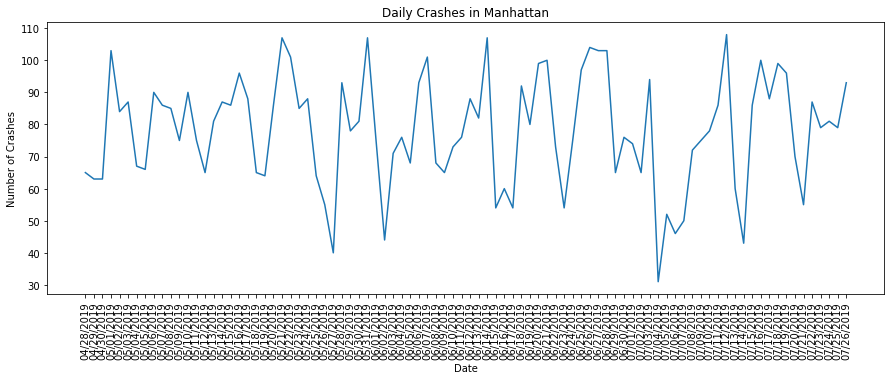

In [65]:
plt.figure(figsize=(15,5))
plt.plot(Entries_Crashes_Manhattan['DATE'], Entries_Crashes_Manhattan['CRASH COUNT'])
plt.ylabel('Number of Crashes')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Crashes in Manhattan')
plt.savefig('DailyCrashes-Manhattan.png', bbox_inches='tight')

Does the number of metro entries affect the number of car crashes?

In [67]:
# change type of date to datetime


Entries_Crashes_Manhattan["DATE2"] = pd.to_datetime(Entries_Crashes_Manhattan.DATE)
Entries_Crashes_Manhattan

,DATE,FIXED_DAILY_ENTRIES,BOROUGH,CRASH COUNT,DATE2
0,04/28/2019,95287.0,MANHATTAN,65,2019-04-28
1,04/29/2019,31867.0,MANHATTAN,63,2019-04-29
2,04/30/2019,34052.0,MANHATTAN,63,2019-04-30
3,05/01/2019,35910.0,MANHATTAN,103,2019-05-01
4,05/02/2019,36464.0,MANHATTAN,84,2019-05-02
...,...,...,...,...,...
85,07/22/2019,27008.0,MANHATTAN,87,2019-07-22
86,07/23/2019,30668.0,MANHATTAN,79,2019-07-23
87,07/24/2019,32680.0,MANHATTAN,81,2019-07-24
88,07/25/2019,33350.0,MANHATTAN,79,2019-07-25


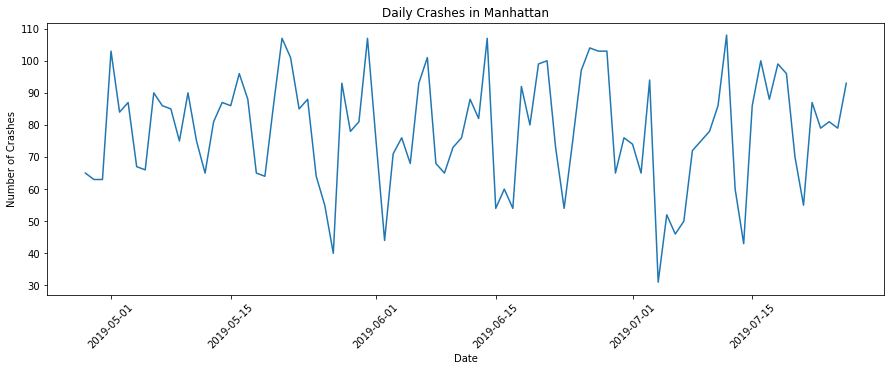

In [68]:
plt.figure(figsize=(15,5))
plt.plot(Entries_Crashes_Manhattan['DATE2'], Entries_Crashes_Manhattan['CRASH COUNT'])
plt.ylabel('Number of Crashes')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Crashes in Manhattan')
plt.savefig('DailyCrashes-Manhattan2.png', bbox_inches='tight')

Does the 4th of July holiday affects the number of metro stations entries?

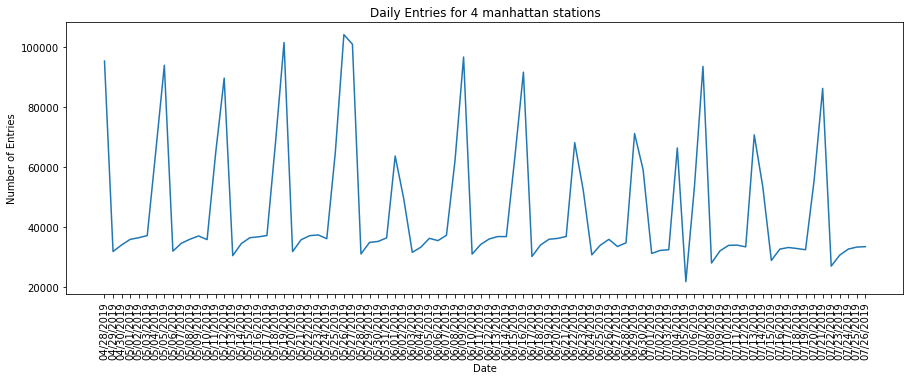

In [69]:
plt.figure(figsize=(15,5))
plt.plot(Entries_Crashes_Manhattan['DATE'], Entries_Crashes_Manhattan['FIXED_DAILY_ENTRIES'])
plt.ylabel('Number of Entries')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Entries for 4 manhattan stations')
plt.savefig('EntriesFor4Stations-Manhattan.png', bbox_inches='tight')

Does the number of metro entries affect the number of car crashes?

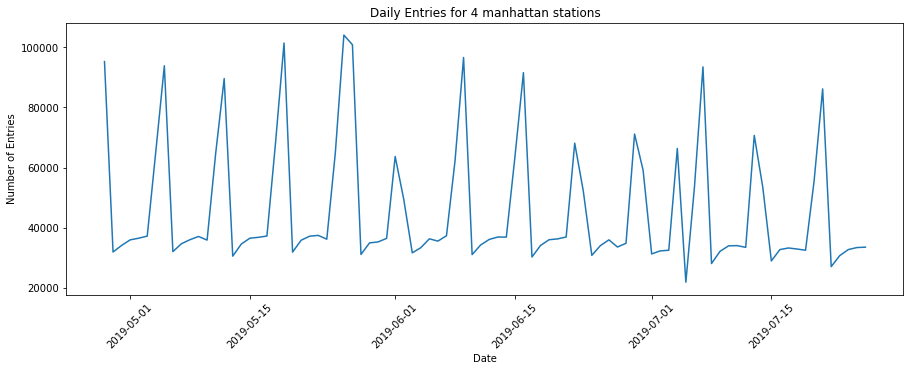

In [71]:
plt.figure(figsize=(15,5))
plt.plot(Entries_Crashes_Manhattan['DATE2'], Entries_Crashes_Manhattan['FIXED_DAILY_ENTRIES'])
plt.ylabel('Number of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 4 manhattan stations')
plt.savefig('EntriesFor4Stations-Manhattan2.png', bbox_inches='tight')

Does the number of stations in each borough affects the number of car crashes in that borough?

In [72]:
list_of_boroughs = ['the Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
number_of_stations = [70, 170, 472, 81, 21]

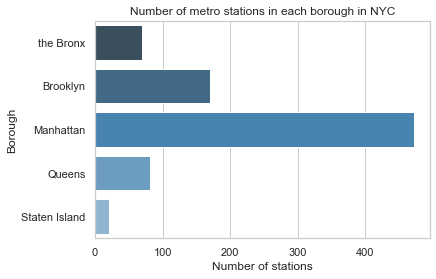

In [73]:
# graph using seaborn 
import seaborn as sns


sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_d", len(list_of_boroughs))
ax = sns.barplot(x=number_of_stations,y = list_of_boroughs, orient = 'h', palette=np.array(pal[::-1]))
ax.set(xlabel="Number of stations", ylabel = "Borough", title='Number of metro stations in each borough in NYC')
plt.savefig('Borough_station.png', bbox_inches='tight')

In [74]:
borough_crashes = CC_mask.groupby(["DATE", "BOROUGH"])["CRASH COUNT"].count().reset_index()

Join with 'manhattan_stations_daily' to get the exact dates

In [75]:
borough_crashes = manhattan_stations_daily.merge(borough_crashes, on='DATE', how='left')
borough_crashes

,DATE,FIXED_DAILY_ENTRIES,BOROUGH,CRASH COUNT
0,04/28/2019,95287.0,BRONX,30
1,04/28/2019,95287.0,BROOKLYN,80
2,04/28/2019,95287.0,MANHATTAN,65
3,04/28/2019,95287.0,QUEENS,75
4,04/28/2019,95287.0,STATEN ISLAND,3
...,...,...,...,...
535,07/26/2019,33484.0,BROOKLYN,132
536,07/26/2019,33484.0,MANHATTAN,93
537,07/26/2019,33484.0,QUEENS,108
538,07/26/2019,33484.0,STATEN ISLAND,9


In [77]:
# group by borough

borough_crashes_p2 = borough_crashes.groupby(['BOROUGH'])['CRASH COUNT'].sum().reset_index()
borough_crashes_p2

,BOROUGH,CRASH COUNT
0,BRONX,5998
1,BROOKLYN,11868
2,MANHATTAN,7039
3,QUEENS,10567
4,STATEN ISLAND,834
5,Unknown,19745


In [78]:
# remove the unknown borough
borough_crashes_p2 = borough_crashes_p2[borough_crashes_p2['BOROUGH'] != 'Unknown']
borough_crashes_p2 

,BOROUGH,CRASH COUNT
0,BRONX,5998
1,BROOKLYN,11868
2,MANHATTAN,7039
3,QUEENS,10567
4,STATEN ISLAND,834


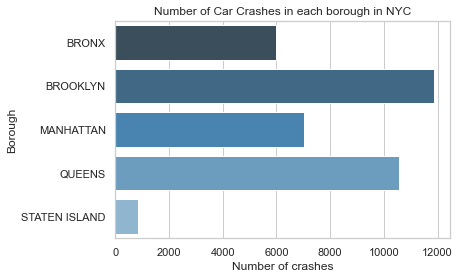

In [79]:
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_d", len(borough_crashes_p2))
ax = sns.barplot(x='CRASH COUNT',y = 'BOROUGH',data=borough_crashes_p2 , orient = 'h', palette=np.array(pal[::-1]))
ax.set(xlabel="Number of crashes", ylabel = "Borough", title='Number of Car Crashes in each borough in NYC')
plt.savefig('Borough_crash.png', bbox_inches='tight')